<a href="https://colab.research.google.com/github/NayakAbhishek/Quantitative-Finance/blob/main/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose is to use Monte Carlo Methods to construct an optimum portfolio according to Modern Portfolio Theory

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import yfinance as yf
# yf.pdr_override()  # This function is no longer needed
sns.set()

# Use yfinance directly to fetch data instead of pdr_override
# Example:
# data = yf.download("AAPL", start="2023-01-01", end="2023-01-31")

To build our portfolio, we will focus on stocks from Apple, Walmart, Tesla, General Electric, Amazon and Deutsche Bank on the arbitrary time period from 2013-01-01 to 2024-01-01.

We focus on the adjusted close price of each company and with that, we obtain the daily logarithmic returns:

$$ R_i = log (r_{i}/r_{i-1}) $$

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf  # Import yfinance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

stock = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2024-01-01')

# Use yfinance to download data
data = yf.download(stock, start=start, end=end)['Adj Close']  # Changed to yf.download
complete_data = yf.download(stock, start=start, end=end)  # Changed to yf.download
daily_returns = (data / data.shift(1)) - 1
returns = np.log(data / data.shift(1))

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed


In [5]:
complete_data.head()

Price                      Adj Close                                           \
Ticker                          AAPL     AMZN         DB         GE      TSLA   
Date                                                                            
2013-01-02 00:00:00+00:00  16.705700  12.8655  35.789799  82.329826  2.357333   
2013-01-03 00:00:00+00:00  16.494839  12.9240  35.529877  81.403862  2.318000   
2013-01-04 00:00:00+00:00  16.035383  12.9575  36.096970  81.789635  2.293333   
2013-01-07 00:00:00+00:00  15.941053  13.4230  36.845219  81.519623  2.289333   
2013-01-08 00:00:00+00:00  15.983954  13.3190  37.341423  80.632263  2.245333   

Price                                     Close                      \
Ticker                           WMT       AAPL     AMZN         DB   
Date                                                                  
2013-01-02 00:00:00+00:00  18.031246  19.608213  12.8655  43.358780   
2013-01-03 00:00:00+00:00  17.916656  19.360714  12.9240  43.043892   
2013-01-04 00:00:00+00:00  17.984364  18.821428  12.9575  43.730915   
2013-01-07 00:00:00+00:00  17.812492  18.710714  13.4230  44.637405   
2013-01-08 00:00:00+00:00  17.861965  18.761070  13.3190  45.238548   

Price                                  ...       Open                        \
Ticker                             GE  ...         DB          GE      TSLA   
Date                                   ...                                    
2013-01-02 00:00:00+00:00  102.270615  ...  43.416031  103.085327  2.333333   
2013-01-03 00:00:00+00:00  101.120430  ...  42.948475  102.941551  2.345333   
2013-01-04 00:00:00+00:00  101.599670  ...  43.167938  101.647598  2.320000   
2013-01-07 00:00:00+00:00  101.264198  ...  44.618320  101.407974  2.320000   
2013-01-08 00:00:00+00:00  100.161942  ...  45.486641  101.120430  2.300000   

Price                                    Volume                               \
Ticker                           WMT       AAPL      AMZN       DB        GE   
Date                                                                           
2013-01-02 00:00:00+00:00  22.976667  560518000  65420000  1515094   9617131   
2013-01-03 00:00:00+00:00  23.083332  352965200  55018000  1489313  10122010   
2013-01-04 00:00:00+00:00  22.910000  594333600  37484000   732238   6218673   
2013-01-07 00:00:00+00:00  22.943333  484156400  98200000  1723646   6832995   
2013-01-08 00:00:00+00:00  22.760000  458707200  60214000  1607842   8355978   

Price                                          
Ticker                         TSLA       WMT  
Date                                           
2013-01-02 00:00:00+00:00  17922000  31172400  
2013-01-03 00:00:00+00:00  11130000  26730300  
2013-01-04 00:00:00+00:00  10110000  19314000  
2013-01-07 00:00:00+00:00   6630000  18604200  
2013-01-08 00:00:00+00:00  19260000  17600700  

[5 rows x 36 columns]

In [7]:
data.head() # Just the Ajd. Closed columns

Ticker,AAPL,AMZN,DB,GE,TSLA,WMT
Date,,,,,,
2013-01-02 00:00:00+00:00,16.705700,12.8655,35.789799,82.329826,2.357333,18.031246
2013-01-03 00:00:00+00:00,16.494839,12.9240,35.529877,81.403862,2.318000,17.916656
2013-01-04 00:00:00+00:00,16.035383,12.9575,36.096970,81.789635,2.293333,17.984364
2013-01-07 00:00:00+00:00,15.941053,13.4230,36.845219,81.519623,2.289333,17.812492
2013-01-08 00:00:00+00:00,15.983954,13.3190,37.341423,80.632263,2.245333,17.861965


In [8]:
returns.head() # The log returns

Ticker,AAPL,AMZN,DB,GE,TSLA,WMT
Date,,,,,,
2013-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03 00:00:00+00:00,-0.012702,0.004537,-0.007289,-0.011311,-0.016826,-0.006375
2013-01-04 00:00:00+00:00,-0.028250,0.002589,0.015835,0.004728,-0.010699,0.003772
2013-01-07 00:00:00+00:00,-0.005900,0.035295,0.020517,-0.003307,-0.001746,-0.009603
2013-01-08 00:00:00+00:00,0.002688,-0.007778,0.013377,-0.010945,-0.019407,0.002774


In [ ]:
# data.to_csv('DATA.cvs') If we want to save the data

Some basic visualization of our data:

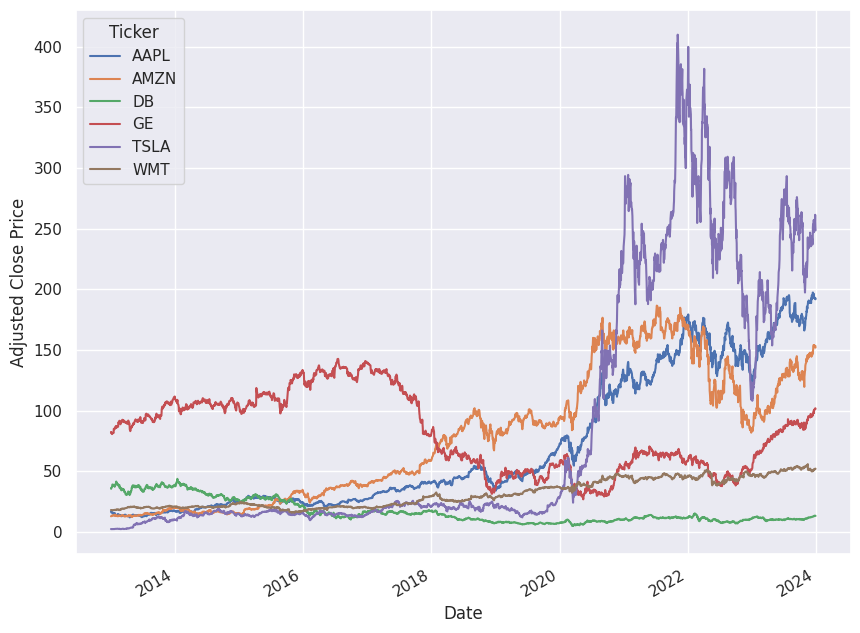

In [9]:
data.plot(figsize=(10,8))
plt.ylabel('Adjusted Close Price')
plt.show()

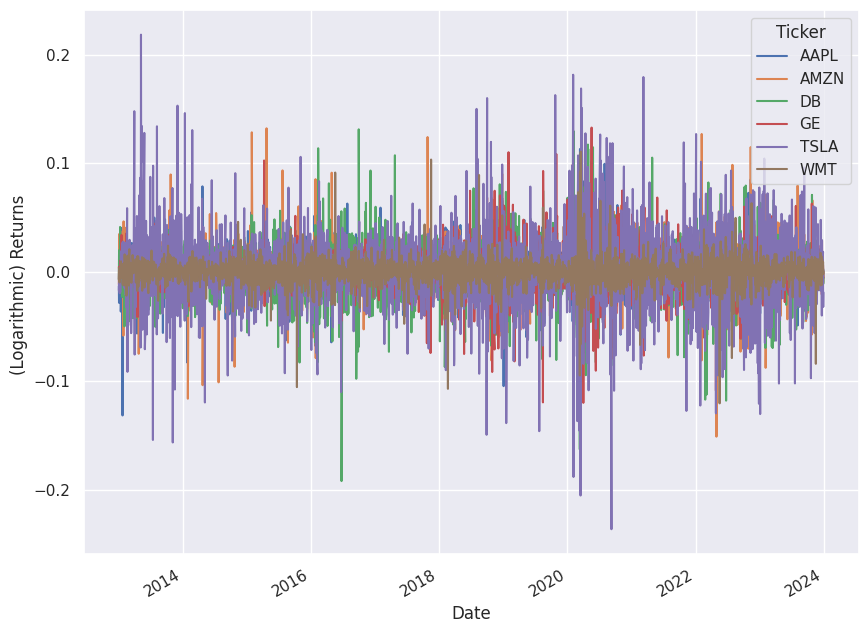

In [10]:
returns.plot(figsize=(10,8))
plt.ylabel('(Logarithmic) Returns ')
plt.show()

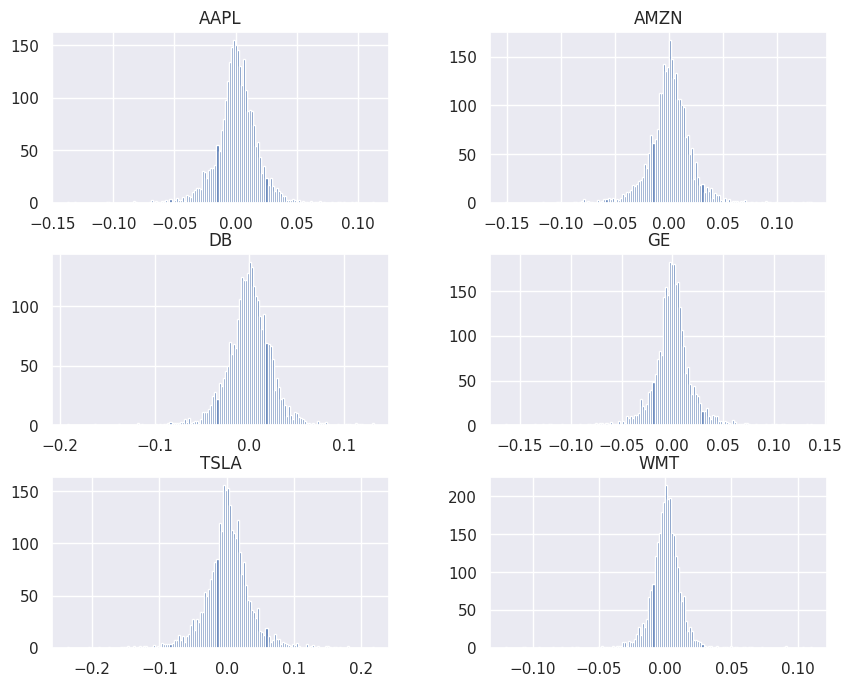

In [11]:
returns.hist(figsize=(10,8), bins = (150))
#plt.ylabel('(Logarithmic) Returns ')
plt.show()

We obtain the annualized return of each company by computing the mean and using $ \mu^{Annual} = 252\, \mu$, where 252 is the number or trading days by year. Similarly, we compute the anualized covariance matrix as $ \sigma_{ij}^{Annual}=252\,\sigma_{ij}$.

In [12]:
print('Annualized Returns')
print(returns.mean()*252)
print('\n')
print('Anualized Covariance Matrix')
print(returns.cov()*252)

Annualized Returns
Ticker
AAPL    0.222284
AMZN    0.224854
DB     -0.091089
GE      0.018935
TSLA    0.424204
WMT     0.096534
dtype: float64


Anualized Covariance Matrix
Ticker      AAPL      AMZN        DB        GE      TSLA       WMT
Ticker                                                            
AAPL    0.080794  0.046301  0.034988  0.030868  0.061111  0.017413
AMZN    0.046301  0.106178  0.034965  0.026354  0.069462  0.016491
DB      0.034988  0.034965  0.152744  0.056943  0.052022  0.013389
GE      0.030868  0.026354  0.056943  0.107583  0.040843  0.011946
TSLA    0.061111  0.069462  0.052022  0.040843  0.320995  0.016911
WMT     0.017413  0.016491  0.013389  0.011946  0.016911  0.040648


We also check the correlations between returns. We observe that there is no significant correlation.

<Axes: xlabel='Ticker', ylabel='Ticker'>

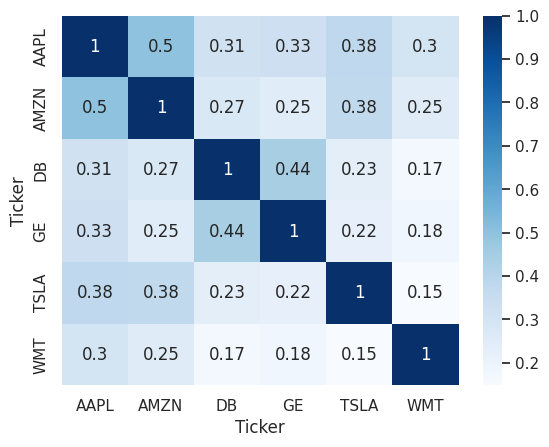

In [13]:
sns.heatmap(returns.corr(), cmap= 'Blues', annot=True)

<matplotlib.axes._subplots.AxesSubplot at 0x1a1a459128>

# ========================================

We start building the portfolio. We begin defining a function that produces random weights $W_{i}$. Clearly, we ask that $\sum W_{i} = 1$, where the index $i$ refers to the different companies that compose our portfolio.

In [14]:
def initialize_weights():
    weights = np.random.random(len(stock))
    weights /= np.sum(weights)
    return weights;

We compute the portfolio annualized return as $\mu_{P}^{Annual} =  \sum W_{i} \mu_{i}^{Annual} $.

In [15]:
def  calculate_portfolio_returns(returns, weights):
    portfolio_return = np.sum(returns.mean()*weights)*252
    print('Expected Portfolio Return:',  portfolio_return)

And similarly, we compute the portfolio yearly standar deviation as $\sigma_{P}^{Annual} =\sqrt{ \sum_{ij} W_{i}W_{j}\sigma{ij}^{Annual}}$

In [16]:
def calculate_portfolio_variance(returns, weights):
    portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    print('Expected Variance:', portfolio_variance)

In [17]:
weights = initialize_weights()
weights.round(3)

array([0.181, 0.034, 0.368, 0.139, 0.134, 0.144])

In [18]:
calculate_portfolio_returns(returns,weights)

Expected Portfolio Return: 0.08783069357922363


In [19]:
calculate_portfolio_variance(returns,weights)

Expected Variance: 0.24447483989302699


# =====================================

We now use Monte Carlo to generate 50,000 different, random weights $W_{i}$. This will give us the same number of different portfolio allocations.

In [20]:
num_weights = 50000

def generate_portfolios(weights, returns):

    preturns = []
    pvariances = []

    # Monte Carlo simulation: We generate several randon weights and their correspondig portfolios

    for i in range(num_weights):
        weights = np.random.random(len(stock))
        weights /= np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariances.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))

    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    return preturns, pvariances


For the computation of the Sharpe ratio, we set the risk free return to 0.054, which is the 3 Month Treasury Bill Rate by 2024-1-1

In [21]:
def plot_portfolios(returns, variances):
    plt.figure(figsize=(10,6))
    plt.scatter(variances, returns, c = (returns-0.054)/variances, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    plt.show()

In [22]:
monte_carlo_portfolios = generate_portfolios(weights, returns)
preturns = monte_carlo_portfolios[0]
pvariances = monte_carlo_portfolios[1]

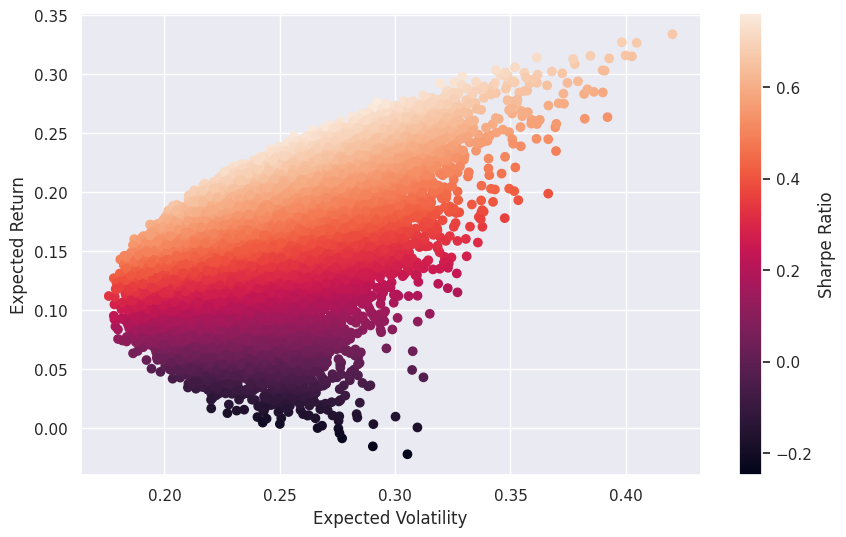

In [23]:
plot_portfolios(preturns, pvariances)

We note that the color scale correspond to the value of the Sharpe ratio of each portfolio radomnly generated. The lighter the color, the higher the value of the Sharpe ratio.

# =================================================

We now find the optimal porfolio. To do this, we use SciPy's optimization algorithms.

In [24]:
import scipy.optimize as optimization

In [25]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean()*weights)*252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([portfolio_return, portfolio_volatility, (portfolio_return-0.014)/portfolio_volatility])

Our optimization problem consists of maximizing the Sharpe ratio.

In [26]:
def min_func_sharpe(weights, returns):
    return -statistics(weights, returns)[2]

This is our optimization algorithm. Here we include the constrains on the weights: the sum of weights is equal to 1. Any weight seed will lead us to the optimum portfolio allocation. To optimize, we use the Sequential Least Squares Programming method.

In [27]:
# f(x) = 0 is the function to minimize.

def optimize_portfolio(weights, returns):
    constraints = ({'type': 'eq','fun': lambda x: np.sum(x)-1} ) # The sum of weights is 1
    bounds = tuple((0,1) for x in range(len(stock))) # Individual weights can at most be 1: I invest everything in 1 stock
    optimum = optimization.minimize(fun = min_func_sharpe, x0 = weights, args = returns, method = 'SLSQP', bounds = bounds, constraints=constraints)
    return optimum

In [28]:
optimum = optimize_portfolio(initialize_weights(),returns)

In [29]:
print(optimum['x'].round(3))

[0.367 0.196 0.    0.    0.219 0.218]


In [30]:
optimum['x'].sum()

1.0

In [31]:
print(statistics(optimum['x'], returns).round(3))

[0.24  0.246 0.917]


# ===================================

In [32]:
# Optimal portfolio according to weights.
def print_optimal_portfolio(optimum, returns):
    print('\n')
    for i in range(len(stock)):
        print('- Optimal Weight for {} is: {}'.format(stock[i], optimum['x'][i].round(3)))
    print('\n')
    print('**********************************************')
    print('\n')
    print('Optimal Weights: ', optimum['x'].round(3))
    print('Expected return, volatility and Sharpe Ratio: ', statistics(optimum['x'], returns).round(3))

In [33]:
def show_optimal_portfolio(optimum, returns, preturns, pvariances):
    plt.figure(figsize=(10,6))
    #plt.plot(x = statistics(optimum['x'], returns)[1],y = statistics(optimum['x'], returns)[0], markersize = 2.0)
    plt.scatter(pvariances, preturns, c = (preturns-0.014)/pvariances, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    plt.scatter(x = statistics(optimum['x'], returns)[1],y = statistics(optimum['x'], returns)[0], c = 'b' )
    #plt.plot(x = statistics(optimum['x'], returns)[1],y = statistics(optimum['x'], returns)[0], color = 'r',markersize = 200.0)
    plt.show()

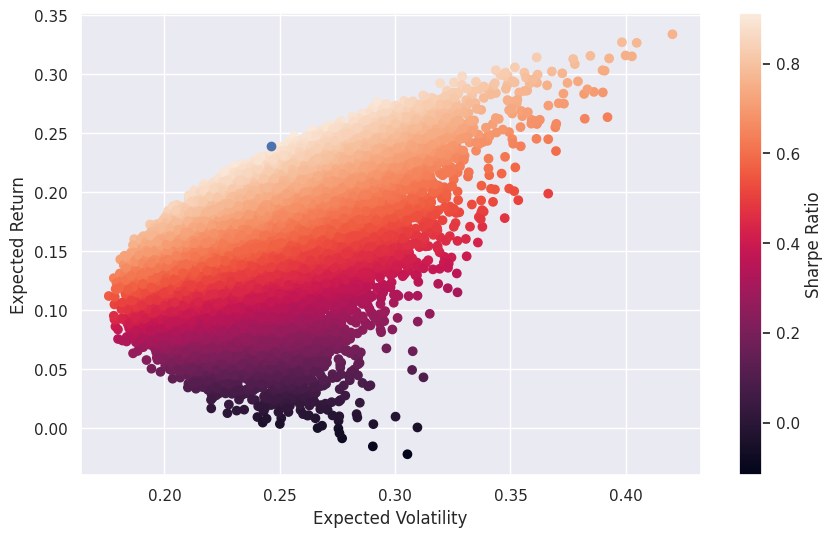

In [34]:
show_optimal_portfolio(optimum, returns, preturns, pvariances)

Our optimal portfolio is shown in the blue spot.

In [35]:
 print_optimal_portfolio(optimum, returns)



- Optimal Weight for AAPL is: 0.367
- Optimal Weight for WMT is: 0.196
- Optimal Weight for TSLA is: 0.0
- Optimal Weight for GE is: 0.0
- Optimal Weight for AMZN is: 0.219
- Optimal Weight for DB is: 0.218


**********************************************


Optimal Weights:  [0.367 0.196 0.    0.    0.219 0.218]
Expected return, volatility and Sharpe Ratio:  [0.24  0.246 0.917]


# =====================================